In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
export= pd.read_csv("C:\\Users\\xabil\\OneDrive\\Escritorio\\eeuu\\export.csv")
export.columns
imports = pd.read_csv("C:\\Users\\xabil\\OneDrive\\Escritorio\\eeuu\\import.csv")


## 1. BC

#### Gráfica por sectores

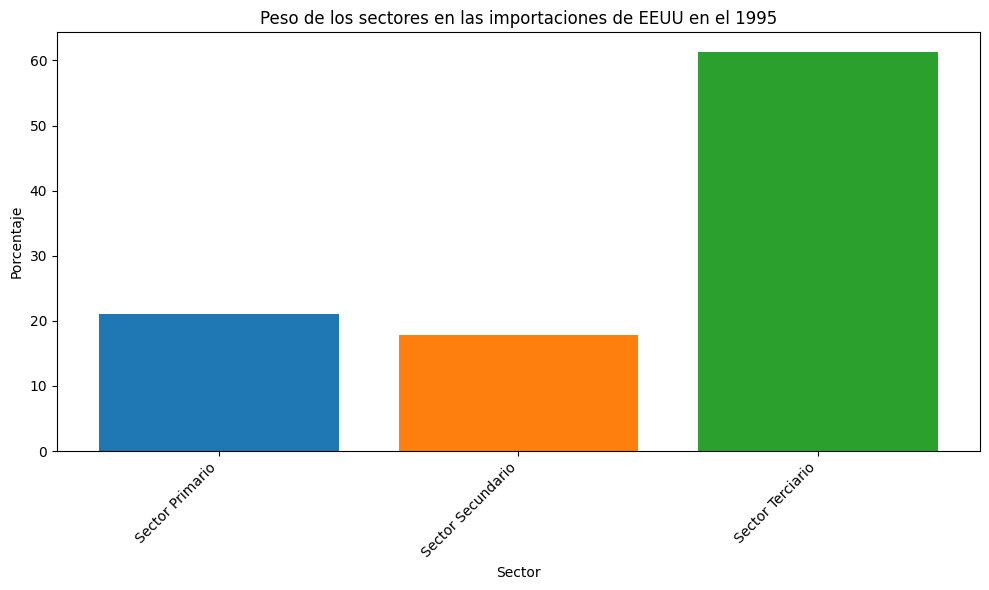

In [2]:
### Exportaciones#####

def limpio(df):
    columstodrop=['HS2', 'HS2 ID', 'HS4', 'HS4 ID','Section ID']
    limpio= df.drop(columstodrop, axis=1)
    return limpio
limpio2 = limpio(imports)

#exportaciones=exportaciones.pivot_table(index='ProductCode', columns='Year', values='Exportaciones').reset_index()
#exportaciones.columns.name = None
def calcular_peso_relativo(df):
    # Pivote del DataFrame para obtener las exportaciones por año y ProductCode
    pivot_df = df.pivot_table(index='Section', columns='Year', values='Trade Value', aggfunc='sum', fill_value=0)
    
    # Calcular la suma total de exportaciones por año
    total_por_ano = pivot_df.sum(axis=0)
    
    # Calcular el peso relativo en porcentaje
    peso_relativo_df = (pivot_df.div(total_por_ano, axis=1)) * 100
    
    return peso_relativo_df
exportaciones= calcular_peso_relativo(limpio2)
exportaciones = exportaciones.reset_index()
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
#####################################################################################################################

col=[ 1996,      1997,      1998,      1999,
            2000,      2001,      2002,      2003,      2004,      2005,
            2006,      2007,      2008,      2009,      2010,      2011,
            2012,      2013,      2014,      2015,      2016,      2017,
            2018,      2019,      2020,2021]

pivot =exportaciones.drop(col, axis=1)

############################################################################################
sector_mapping = {
    'Sector Primario': ['Animal Hides', 'Animal Products', 'Animal and Vegetable Bi-Products',
                        'Vegetable Products', 'Mineral Products', 'Metals', 'Precious Metals'],
    'Sector Secundario': ['Chemical Products', 'Foodstuffs', 'Wood Products', 'Stone And Glass',
                          'Textiles', 'Footwear and Headwear'],
    'Sector Terciario': ['Arts and Antiques', 'Instruments', 'Machines', 'Miscellaneous', 'Paper Goods',
                         'Plastics and Rubbers', 'Transportation', 'Weapons']
}

# Crear un diccionario para almacenar las sumas de cada sector
sector_sums = {sector: 0 for sector in sector_mapping}

# Iterar sobre el DataFrame y sumar los valores correspondientes a cada sector
for sector, items in sector_mapping.items():
    for item in items:
        sector_sums[sector] += pivot[pivot['Section'] == item][1995].values[0]

# Convertir el diccionario a DataFrame
sector_df = pd.DataFrame(list(sector_sums.items()), columns=['Sector', '1995'])
sector_df

plt.figure(figsize=(10, 6))
colors = plt.cm.tab10.colors # Paleta de colores tab20c

plt.bar(sector_df['Sector'], sector_df['1995'], color=colors)

# Configuración adicional
plt.xlabel('Sector')
plt.ylabel('Porcentaje')
plt.title('Peso de los sectores en las importaciones de EEUU en el 1995')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### Gráfica barras por industria.

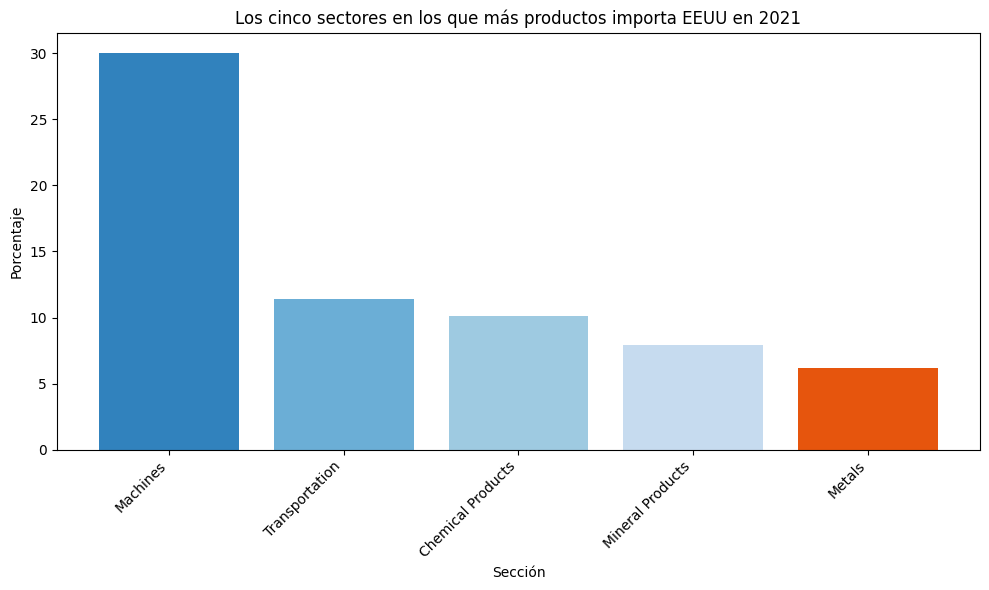

Year,Section,2021
8,Machines,30.04
17,Transportation,11.43
4,Chemical Products,10.15
10,Mineral Products,7.92
9,Metals,6.22


In [3]:
### Exportaciones e importaciones #####

def limpio(df):
    columstodrop=['HS2', 'HS2 ID', 'HS4', 'HS4 ID','Section ID']
    limpio= df.drop(columstodrop, axis=1)
    return limpio
limpio2 = limpio(imports)

#exportaciones=exportaciones.pivot_table(index='ProductCode', columns='Year', values='Exportaciones').reset_index()
#exportaciones.columns.name = None
def calcular_peso_relativo(df):
    # Pivote del DataFrame para obtener las exportaciones por año y ProductCode
    pivot_df = df.pivot_table(index='Section', columns='Year', values='Trade Value', aggfunc='sum', fill_value=0)
    
    # Calcular la suma total de exportaciones por año
    total_por_ano = pivot_df.sum(axis=0)
    
    # Calcular el peso relativo en porcentaje
    peso_relativo_df = (pivot_df.div(total_por_ano, axis=1)) * 100
    
    return peso_relativo_df
exportaciones= calcular_peso_relativo(limpio2)
exportaciones = exportaciones.reset_index()
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
#####################################################################################################################

col=[ 1995,1996,      1997,      1998,      1999,
            2000,      2001,      2002,      2003,      2004,      2005,
            2006,      2007,      2008,      2009,      2010,      2011,
            2012,      2013,      2014,      2015,      2016,      2017,
            2018,      2019,      2020]

pivot =exportaciones.drop(col, axis=1)

best95=pivot.sort_values(by =2021, ascending=False).head()
#########################################################################################################################

plt.figure(figsize=(10, 6))
colors = plt.cm.tab20c.colors  # Paleta de colores tab20c

plt.bar(best95['Section'], best95[2021], color=colors)

# Configuración adicional
plt.xlabel('Sección')
plt.ylabel('Porcentaje')
plt.title('Los cinco sectores en los que más productos importa EEUU en 2021')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()

# Mostrar el gráfico
plt.show()
best95

In [4]:
def limpio(df):
    columstodrop=['HS2 ID', 'HS4 ID','Section ID']
    limpio= df.drop(columstodrop, axis=1)
    limpio2=['Animal Products', 'Vegetable Products',
       'Animal and Vegetable Bi-Products', 'Foodstuffs',
       'Mineral Products', 'Chemical Products', 'Plastics and Rubbers',
       'Animal Hides', 'Wood Products', 'Paper Goods', 'Textiles',
       'Footwear and Headwear', 'Stone And Glass', 'Precious Metals',
       'Metals','Machines', 'Instruments', 'Weapons',
       'Miscellaneous', 'Arts and Antiques']
    limpio2 = limpio[~limpio['Section'].isin(limpio2)]
    clp=['Section']
    limpio2=limpio2.drop(clp,axis=1)
    clp2=['Railway and trams','Aircraft and spacecraft','Ships, boats, & floating structures']
    limpio2 = limpio2[~limpio2['HS2'].isin(clp2)]
    clp=['HS2']
    limpio2 =limpio2.drop(clp,axis=1)
    return limpio2
limpio2 = limpio(export)

#exportaciones=exportaciones.pivot_table(index='ProductCode', columns='Year', values='Exportaciones').reset_index()
#exportaciones.columns.name = None
def calcular_peso_relativo(df):
    # Pivote del DataFrame para obtener las exportaciones por año y ProductCode
    pivot_df = df.pivot_table(index='HS4', columns='Year', values='Trade Value', aggfunc='sum', fill_value=0)
    
    # Calcular la suma total de exportaciones por año
    total_por_ano = pivot_df.sum(axis=0)
    
    # Calcular el peso relativo en porcentaje
    peso_relativo_df = (pivot_df.div(total_por_ano, axis=1)) * 100
    
    return peso_relativo_df
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', None)
l= calcular_peso_relativo(limpio2).reset_index()



#### Industria con el Sector servicios.

In [5]:
lcd = pd.read_csv("C:\\Users\\xabil\\OneDrive\\Escritorio\\eeuu\\Servicios EEUU\\What did United States of America export between 1995 and 2021_.csv")
lcd.head()

,Name,Code,Year,Current Gross Export,Sector
0,"Textiles, garments, footwear and furniture",0 HS92,1995,$26.6B,Textiles
1,"Textiles, garments, footwear and furniture",0 HS92,1996,$27.5B,Textiles
2,"Textiles, garments, footwear and furniture",0 HS92,1997,$31.1B,Textiles
3,"Textiles, garments, footwear and furniture",0 HS92,1998,$32.1B,Textiles
4,"Textiles, garments, footwear and furniture",0 HS92,1999,$29.7B,Textiles


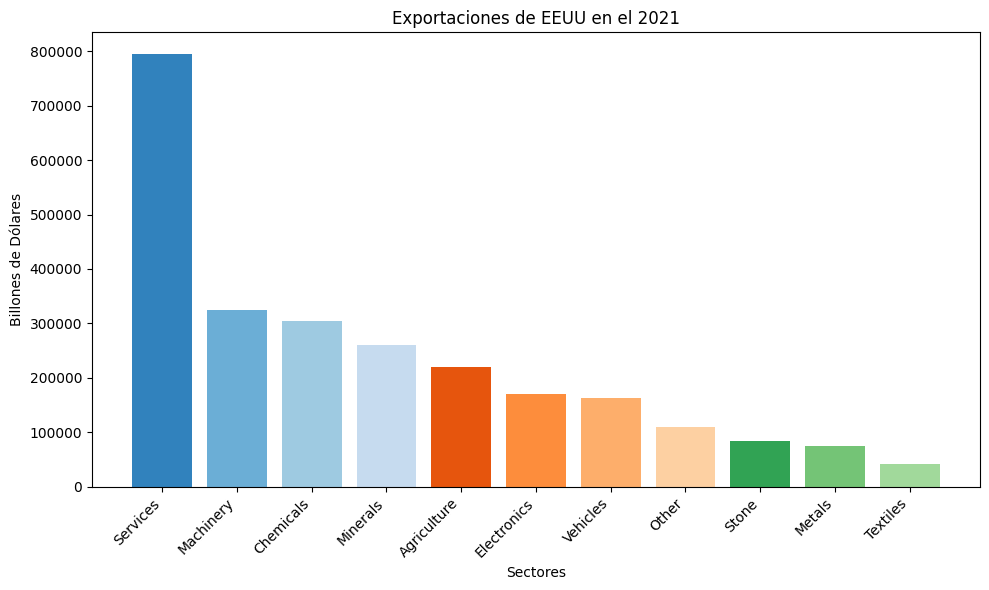

Year,Sector,2021
7,Services,795000
3,Machinery,325000
1,Chemicals,304000
5,Minerals,260000
0,Agriculture,220000
2,Electronics,171000
10,Vehicles,163000
6,Other,109000
8,Stone,83600
4,Metals,74600


In [6]:
col =['Name','Code' ]
lcd.drop(col, axis=1)
lcd['Year'].unique()
years =[ 1995,1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020]
l = lcd.pivot_table(index='Sector', columns='Year', values='Current Gross Export', aggfunc='sum', fill_value=0)
l= l.drop(years, axis=1).reset_index()

def monetary_to_integer(monetary_value):
    value = monetary_value.replace('$', '')  # Eliminar el símbolo '$'
    value = value[:-1]  # Eliminar el sufijo 'B'
    if monetary_value.endswith('B'):  # Si es billón, multiplicar por 1,000,000
        return int(float(value) * 1000)
    elif monetary_value.endswith('M'):  # Si es millón, simplemente convertir a int
        return int(float(value))
    else:  # Si no tiene sufijo, asumir que es millón
        return int(float(value))
# Aplicar la función a la columna '1995' para convertir los valores monetarios en números enteros
l[2021] = l[2021].apply(monetary_to_integer)
l = l.sort_values(by=2021, ascending= False)

plt.figure(figsize=(10, 6))
colors = plt.cm.tab20c.colors  # Paleta de colores tab20c

plt.bar(l['Sector'], l[2021], color=colors)

# Configuración adicional
plt.xlabel('Sectores')
plt.ylabel('Billones de Dólares')
plt.title('Exportaciones de EEUU en el 2021')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()

# Mostrar el gráfico
plt.show()
l

## 2. Comercio Internacional

In [7]:
exports = pd.read_csv("C:\\Users\\xabil\\OneDrive\\Escritorio\\eeuu\\composición de la balanza\exports.csv")
exports.head()
imports = pd.read_csv("C:\\Users\\xabil\\OneDrive\\Escritorio\\eeuu\\composición de la balanza\imports.csv")



### Continentes

In [8]:
lr = exports.merge(imports,on=['Country','Year'])

lr['Diferencia'] = lr['Trade Value_x'] - lr['Trade Value_y']
l.columns
lw= ['Country', 'Continent ID_x', 'Country ID_x', 'ISO 3_x','Continent_y', 'Continent ID_y',
       'Country ID_y', 'ISO 3_y', 'Trade Value_y']
l = lr.drop(lw,axis=1)
l.sort_values(by='Diferencia', ascending = True)
l.head()
l = l.pivot_table(index = 'Continent_x', columns= 'Year', values= 'Diferencia',aggfunc= 'sum',fill_value=0).reset_index()
l =l.sort_values(by=2021, ascending= True)
l.head(10)
l['TV1995-2021'] = (abs(l[2021]-l[1995])/l[1995])*100
#l.sort_values(by='TV1995-2021', ascending= True)
l.head(10)
col=[ 1995,          1996,          1997,
                1998,          1999,          2000,          2001,
                2002,          2003,          2004,          2005,
                2006,          2007,          2008,          2009,
                2010,          2011,          2012,          2013,
                2014,          2015,          2016,          2017,
                2018,          2019,          2020,          2021]
#l = l.drop(col,axis=1)
l.head(10)


Year,Continent_x,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,TV1995-2021
2,Asia,-107089254508,-88467570783,-104413355358.00,-143010400682,-184522795085.00,-222912562474,-196265538773,-223377888114,-244810196133,-300396552823,-355540536803,-380896605724,-385841714257,-379379187113,-281868984631,-357202083155,-394544819292,-450247525976,-445646835850,-483892428037,-482920041301.00,-468582923567,-508379391996.00,-565522969781,-524249359838,-551272255926,-697743062373,-551.55
3,Europe,-6079381703,-9228342209,-9153905513.00,-20235240200,-36775631362.00,-48037861777,-53097675140,-83973711513,-94735630966,-119825131564,-130566315798,-117882597771,-108961695367,-86981328307,-70792415740,-91746809475,-100013003793,-108052215449,-115754067392,-138012621964,-151012561729.00,-147101623781,-159362177035.00,-201581193353,-208002117266,-218057311232,-237906348028,-3813.33
4,North America,-41067072820,-49284642016,-41887686879.00,-38278613224,-60460523020.00,-84913560351,-88099912787,-87706027305,-100299438124,-122109416437,-151552132224,-162189751382,-158764134799,-167031163490,-92206227949,-123662746799,-134980145577,-132451664422,-133121455420,-136736030156,-117648266785.00,-110438866816,-121677048393.00,-136842919733,-161788561625,-158065074063,-186173820254,-353.34
0,Africa,-3655946727,-7523442353,-7301557275.00,-3988346899,-4724982440.00,-10831475668,-10447946490,-9266866952,-19838877421,-29172350988,-44614123697,-57783923104,-61178428996,-76805438364,-33323722620,-49258517745,-58226112591,-33482004443,-11933841890,6558606458,5739262298.00,-967771079,-6392111269.00,-3230660509,1726374501,2771750562,-7530216666,-105.97
1,Antarctica,-390529,-458036,0.00,-382722,0.00,489843,398180,686723,262302,3173128,210055,29771,-119676,4201756,798473,554916,765652,1147512,1425911,7437706,7085610.00,4782601,2716689.00,781089,1565295,729986,4160820,-1165.43
5,Oceania,8730363125,9617893714,8552036231.00,7423275800,7885948287.00,7983433150,5759049916,6826994715,7513481501,7379407771,9225548830,10884387273,10917197515,12453478483,11436894231,13284565486,17151704643,19343771956,15112300337,14065920041,12343836623.00,12303269401,13962765638.00,13812119578,14222922205,10586376501,10744599004,23.07
6,South America,4769723371,-2557272060,4926876296.00,7217685711,-3440770768.00,-16440325605,-10853880867,-16085134280,-20573117819,-41762193770,-45499364731,-43349752499,-36596798636,-21992013843,-8548535535,-9019871214,-14409356814,-5183876929,2195369258,4893212834,11964880599.00,2191508372,3667127035.00,9354225622,16751950194,13042244315,17526735744,267.46


In [9]:
col=['Continent ID', 'Country', 'Country ID', 'ISO 3',
       ]
lim = imports.drop(col, axis=1)
pivot_df = lim.pivot_table(index='Continent', columns='Year', values='Trade Value', aggfunc='sum', fill_value=0)
l = pivot_df.reset_index()
q=['Antarctica']
#############################################################

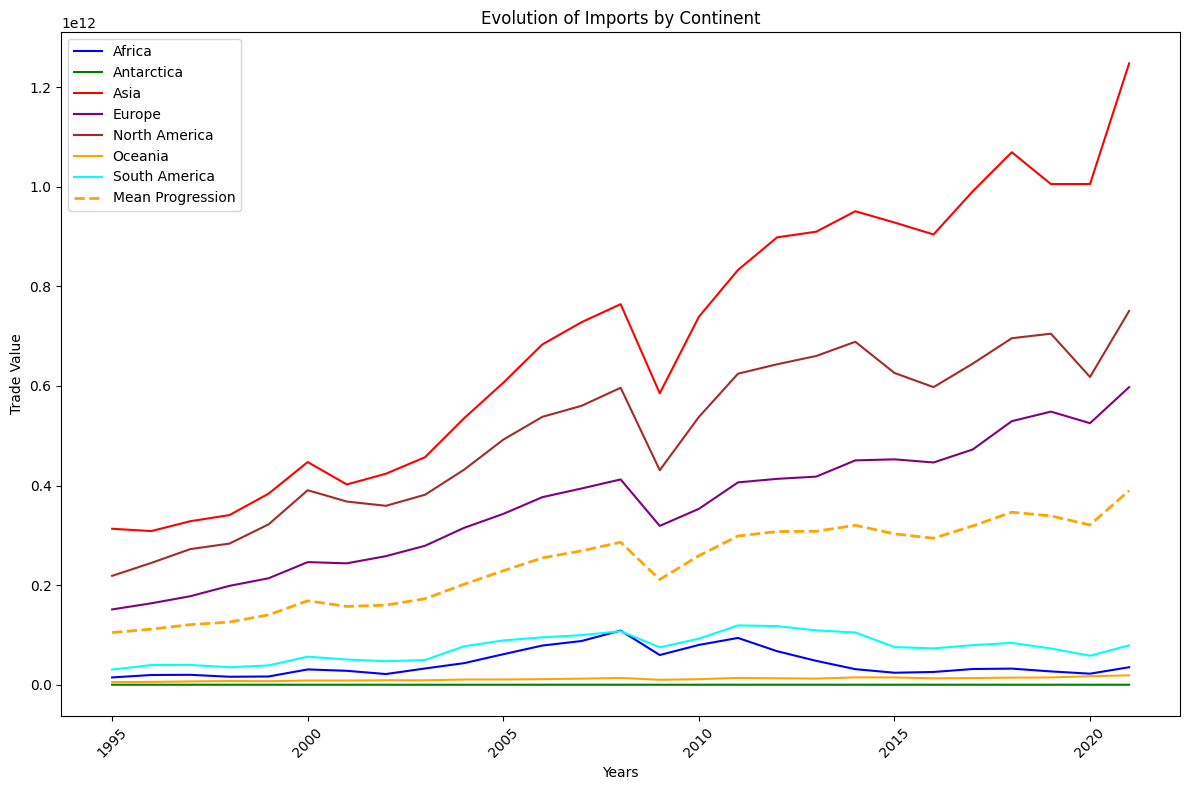

In [10]:
def grafica_exportaciones(df):
    # Extraer años y colores
    years = df.columns[1:]
    colors = ['blue', 'green', 'red', 'purple', 'brown','orange','cyan']

    # Configurar el gráfico
    plt.figure(figsize=(12, 8))

    # Iterar sobre cada fila (correspondiente a un continente)
    for i, row in df.iterrows():
        Continent = row['Continent']
        values = row[1:]  # Obtener los valores de comercio para cada año

        # Graficar la serie temporal para cada continente
        plt.plot(years, values, label=Continent, color=colors[i % len(colors)])

    mean_progression = df.iloc[:, 1:].mean(axis=0)
        # Graficar la línea de la progresión media
    plt.plot(years, mean_progression, label='Mean Progression', linestyle='--', linewidth=2, color='orange')

       
    # Configuración adicional del gráfico
    plt.title('Evolution of Imports by Continent')
    plt.xlabel('Years')
    plt.ylabel('Trade Value')
    plt.legend()
    plt.xticks(rotation=45)  # Rotar los años para mejor visualización

    plt.tight_layout()
    return plt.show()
grafica_exportaciones(l)

In [11]:
def calcular_peso_relativo(df):
    # Pivote del DataFrame para obtener las exportaciones por año y ProductCode
    pivot_df = df.pivot_table(index='Continent', columns='Year', values='Trade Value', aggfunc='sum', fill_value=0)
    
    # Calcular la suma total de exportaciones por año
    total_por_ano = pivot_df.sum(axis=0)
    
    # Calcular el peso relativo en porcentaje
    peso_relativo_df = (pivot_df.div(total_por_ano, axis=1)) * 100
    
    return peso_relativo_df
rl = calcular_peso_relativo(lim).reset_index()
cl=['Antarctica']
rl = rl[~rl['Continent'].isin(cl)]

### Países

In [12]:
l = exports.merge(imports,on=['Country','Year'])

l['Diferencia'] = l['Trade Value_x'] - l['Trade Value_y']
l.columns
lw= ['Continent_x', 'Continent ID_x', 'Country ID_x', 'ISO 3_x','Continent_y', 'Continent ID_y',
       'Country ID_y', 'ISO 3_y', 'Trade Value_y']
l = l.drop(lw,axis=1)
l.sort_values(by='Diferencia', ascending = True)
l.head()
l = l.pivot_table(index = 'Country', columns= 'Year', values= 'Diferencia',aggfunc= 'sum',fill_value=0).reset_index()
l =l.sort_values(by=2021, ascending= True)
l.head(10)
l['TV1995-2021'] = (abs(l[2021]-l[1995])/l[1995])*100
#l.sort_values(by='TV1995-2021', ascending= True)
l.head(10)
col=[ 1995,          1996,          1997,
                1998,          1999,          2000,          2001,
                2002,          2003,          2004,          2005,
                2006,          2007,          2008,          2009,
                2010,          2011,          2012,          2013,
                2014,          2015,          2016,          2017,
                2018,          2019,          2020,          2021]
l = l.drop(col,axis=1)
l.head(10)

Year,Country,TV1995-2021
43,China,-1450.06
128,Mexico,-527.39
37,Canada,-244.75
218,Vietnam,179728.52
79,Germany,-419.90
102,Japan,-6.50
98,Ireland,11087.05
100,Italy,-440.20
44,Chinese Taipei,-241.35
199,Thailand,-626.11


#### gráfica de barras

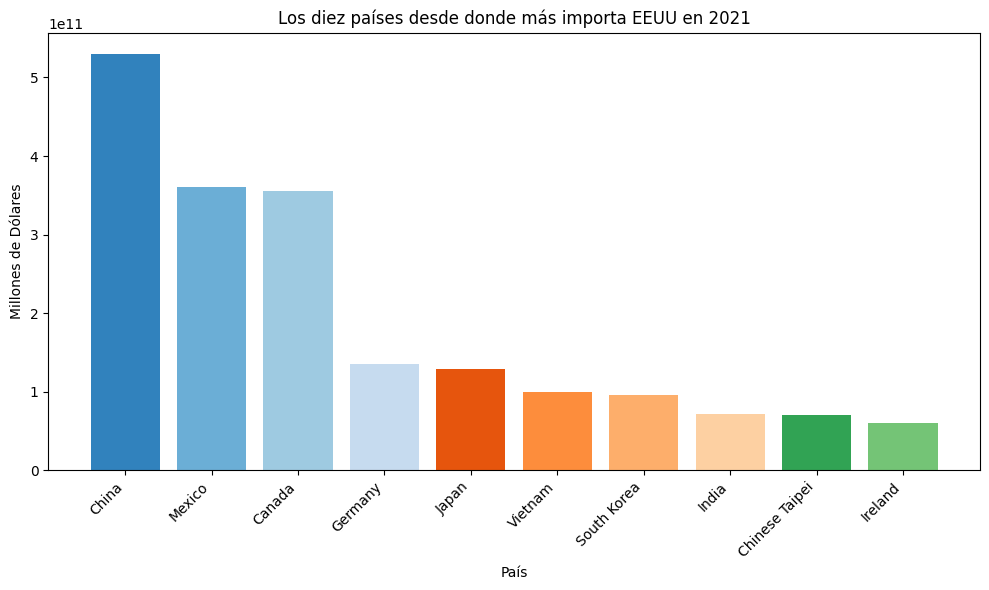

Year,Country,2021,Normalización
43,China,530253944557.00,1.00
128,Mexico,360641611958.00,0.68
37,Canada,355000941828.00,0.67
79,Germany,135373121573.00,0.26
102,Japan,128385220421.00,0.24
218,Vietnam,99251826145.00,0.19
188,South Korea,95903710066.00,0.18
94,India,71170050241.00,0.13
44,Chinese Taipei,70856858445.00,0.13
98,Ireland,59797916062.00,0.11


In [13]:
col=['Continent','Continent ID', 'Country ID', 'ISO 3',
       ]
lim = imports.drop(col, axis=1)
pivot_df = lim.pivot_table(index='Country', columns='Year', values='Trade Value', aggfunc='sum', fill_value=0)

l = pivot_df.reset_index()
best95=l.sort_values(by =2021, ascending=False)
best95
cl =[1995,1996,        1997,        1998,
              1999,        2000,        2001,        2002,        2003,
              2004,        2005,        2006,        2007,        2008,
              2009,        2010,        2011,        2012,        2013,
              2014,        2015,        2016,        2017,        2018,
              2019,        2020  
    
]
g =best95.drop(cl, axis =1 )
g['Normalización'] = g[2021]/max(best95[2021])
g = g.head(10)

plt.figure(figsize=(10, 6))
colors = plt.cm.tab20c.colors  # Paleta de colores tab20c

plt.bar(g['Country'], g[2021], color=colors)

# Configuración adicional
plt.xlabel('País')
plt.ylabel('Millones de Dólares')
plt.title('Los diez países desde donde más importa EEUU en 2021')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()

# Mostrar el gráfico
plt.show()
g

#### Gráfica temporal

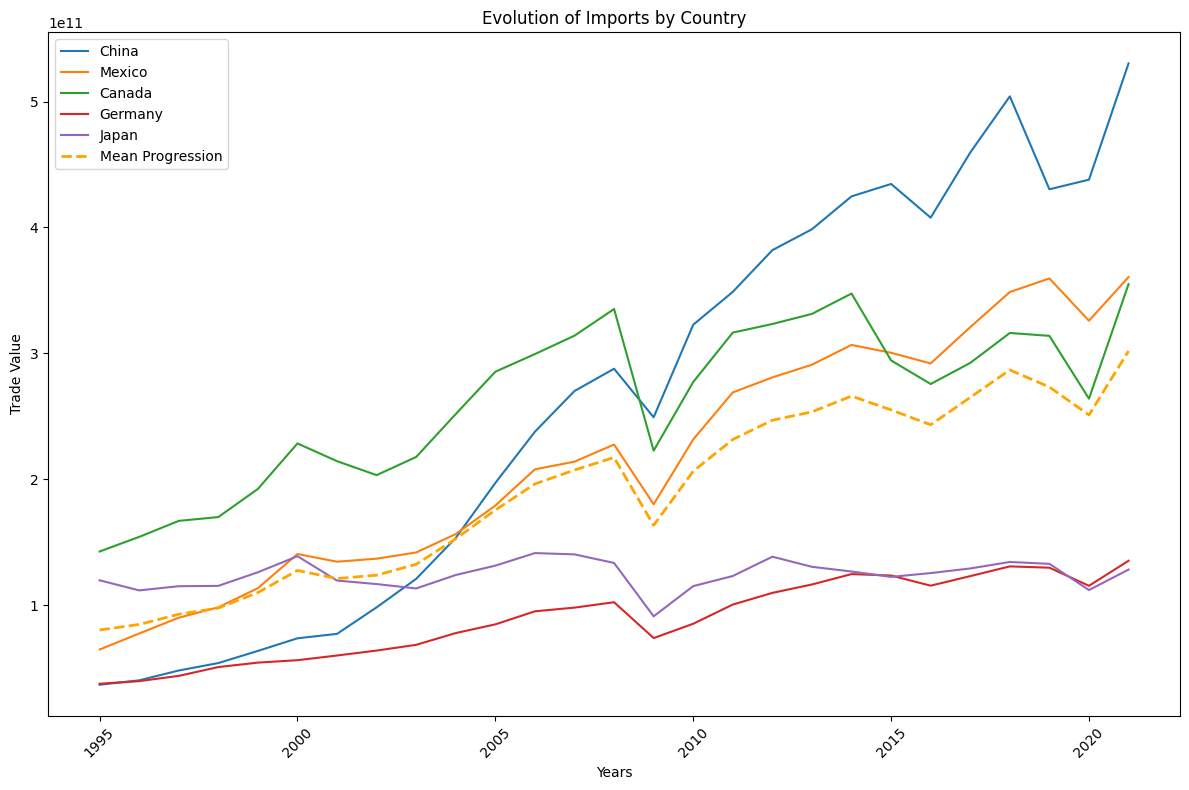

Year,Country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,China,36937023524.00,40439306788,48242706512.00,54159101128.00,63795557331.00,73817722399,77331945239,98390749492.00,121024831439.00,153542318048.00,197171434286.00,237837408716.00,270158782158.00,287829267339.00,249289621635.00,322779999997.00,348867574174.00,381978406283.00,398583897406.00,424679441477.00,434534253073.00,407786479853.00,459498493036.00,504084514690.00,430317776221.00,437941296945.00,530253944557.00
1,Mexico,64909868481.00,77609871484,90172571674.00,98455956443.00,113611704856.00,140742159613,134615740440,137017091031.00,141972120813.00,156587490353.00,179187194411.00,207971676310.00,214043901983.00,227674363366.00,180227582957.00,231710836845.00,269031323017.00,280933912985.00,291032758348.00,306729274530.00,300493880548.00,292024763104.00,320865036773.00,348738900675.00,359532595777.00,325948621844.00,360641611958.00
2,Canada,142720227705.00,154324941345,167029307327.00,170065229097.00,192411535295.00,228512688546,214421002874,203351673993.00,217802891889.00,251876797231.00,285470496255.00,299465463021.00,314095668014.00,335244374774.00,222795555100.00,277311592493.00,316541033290.00,323352908535.00,331368818428.00,347522003469.00,294409312368.00,275709420016.00,292452166260.00,316221067148.00,313940970347.00,264054675954.00,355000941828.00
3,Germany,37724754839.00,39787957876,43970229178.00,50970268616.00,54508639552.00,56431226373,60152541673,64077741565.00,68627017857.00,77970060235.00,84871848552.00,95236817017.00,98184108269.00,102450117260.00,73990290124.00,85364877397.00,100598755796.00,109871751435.00,116540962493.00,124787325742.00,123647196708.00,115587161259.00,123169836189.00,130904958616.00,129875671535.00,115496060806.00,135373121573.00
4,Japan,119856066180.00,111850921792,115169598987.00,115441287610.00,126245128174.00,138986075853,119654893034,116861994222.00,113394179614.00,124057969460.00,131497742474.00,141469352925.00,140451334242.00,133618520710.00,91273086371.00,115232306908.00,123269878390.00,138600039565.00,130565595041.00,126833888812.00,122580522528.00,125588421855.00,129257109983.00,134411293442.00,132935521719.00,112114113562.00,128385220421.00


In [14]:
col=['Continent','Continent ID', 'Country ID', 'ISO 3',
       ]
lim = imports.drop(col, axis=1)
pivot_df = lim.pivot_table(index='Country', columns='Year', values='Trade Value', aggfunc='sum', fill_value=0)
ls = pivot_df.sort_values(by=2021, ascending= False).reset_index().head()
ls
###############################################################################################
def grafica_exportaciones(df):
    # Extraer años y colores
    years = df.columns[1:]
    colors = plt.cm.tab10.colors 

    # Configurar el gráfico
    plt.figure(figsize=(12, 8))

    # Iterar sobre cada fila (correspondiente a un continente)
    for i, row in df.iterrows():
        Country = row['Country']
        values = row[1:]  # Obtener los valores de comercio para cada año

        # Graficar la serie temporal para cada continente
        plt.plot(years, values, label=Country, color=colors[i % len(colors)])

    mean_progression = df.iloc[:, 1:].mean(axis=0)
        # Graficar la línea de la progresión media
    plt.plot(years, mean_progression, label='Mean Progression', linestyle='--', linewidth=2, color='orange')

       
    # Configuración adicional del gráfico
    plt.title('Evolution of Imports by Country')
    plt.xlabel('Years')
    plt.ylabel('Trade Value')
    plt.legend()
    plt.xticks(rotation=45)  # Rotar los años para mejor visualización

    plt.tight_layout()
    return plt.show()
grafica_exportaciones(ls)
ls

### 4. Balanza de sevicios

In [15]:
#ebopbs2002
ls= pd.read_csv("C:\\Users\\xabil\\OneDrive\\Escritorio\\eeuu\\Servicios EEUU\\2012-2021.csv")
#RefYear,CmdDesc,Cifvalue
ls.columns
lp= ['TypeCode', 'FreqCode', 'RefPeriodId', 'RefMonth', 'Period',
       'ReporterCode', 'ReporterISO', 'ReporterDesc', 'FlowCode', 'FlowDesc',
       'PartnerCode', 'PartnerISO', 'PartnerDesc', 'Partner2Code',
       'Partner2ISO', 'Partner2Desc', 'ClassificationCode',
       'ClassificationSearchCode', 'IsOriginalClassification', 'CmdCode', 'AggrLevel', 'IsLeaf', 'CustomsCode', 'CustomsDesc',
       'MosCode', 'MotCode', 'MotDesc', 'QtyUnitCode', 'QtyUnitAbbr', 'Qty',
       'IsQtyEstimated', 'AltQtyUnitCode', 'AltQtyUnitAbbr', 'AtlQty',
       'IsAltQtyEstimated', 'NetWgt', 'IsNetWgtEstimated', 'GrossWgt',
       'IsGrossWgtEstimated', 'Fobvalue', 'PrimaryValue',
       'LegacyEstimationFlag', 'IsReported', 'IsAggregate', 'Unnamed: 47']
bs =ls.drop(lp, axis=1)
bs = bs.sort_values('RefYear',ascending=True)
bs = bs.pivot_table(index='CmdDesc', columns='RefYear', values='Cifvalue', aggfunc='sum', fill_value=0).reset_index()
bs = bs.drop(2022,axis=1)
bs = bs.sort_values(2021,ascending=False)
bs = bs.head()



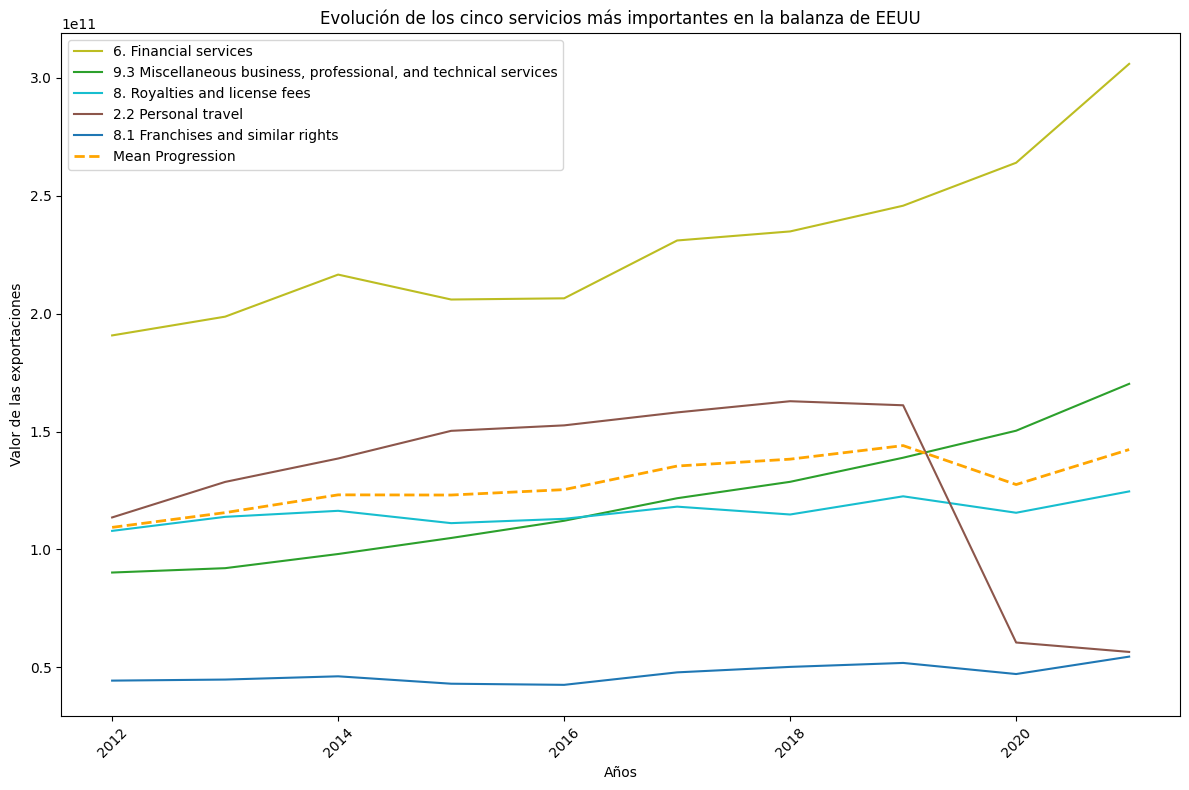

In [16]:
def grafica_exportaciones(df):
    # Extraer años y colores
    years = df.columns[1:]
    colors = plt.cm.tab10.colors 

    # Configurar el gráfico
    plt.figure(figsize=(12, 8))

    # Iterar sobre cada fila (correspondiente a un continente)
    for i, row in df.iterrows():
        Servicios = row['CmdDesc']
        values = row[1:]  # Obtener los valores de comercio para cada año

        # Graficar la serie temporal para cada continente
        plt.plot(years, values, label=Servicios, color=colors[i % len(colors)])

    mean_progression = df.iloc[:, 1:].mean(axis=0)
        # Graficar la línea de la progresión media
    plt.plot(years, mean_progression, label='Mean Progression', linestyle='--', linewidth=2, color='orange')

       
    # Configuración adicional del gráfico
    plt.title('Evolución de los cinco servicios más importantes en la balanza de EEUU')
    plt.xlabel('Años')
    plt.ylabel('Valor de las exportaciones')
    plt.legend()
    plt.xticks(rotation=45)  # Rotar los años para mejor visualización

    plt.tight_layout()
    return plt.show()
grafica_exportaciones(bs)

### Another form

In [17]:
bs2=pd.read_csv(r"C:\Users\xabil\OneDrive\Escritorio\eeuu\DESGLOSE SERVICIOS.csv",sep=';')
indices_a_eliminar = list(range(0, 2)) + list(range(20, 31))
df = bs2.drop(bs2.index[indices_a_eliminar])
df = df.drop(df.index[15:20])
for columna in df.columns[1:]:
    # Reemplazar las comas por puntos en cada celda de la columna
    df[columna] = df[columna].str.replace(',', '.')
df

,Servicios,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2,"Miscellaneous business, professional, and tech...",40.3,43.9,45.5,46.5,51.7,56.6,66.2,79.6,88.1,92.8,77.4,82.9,90.2,92.2,98.1,102,106,122,130
3,Financial services,22.1,21.9,24.5,27.8,36.4,39.9,47.9,61.4,63,64.4,159,78.3,191,NaN,217,NaN,NaN,231,114
4,Royalties and license fees,49.9,48,52,54.9,64.8,72.3,69.9,82.2,84.5,81.7,75.6,21.9,85.7,64.6,93.1,57.1,57.1,94.2,93.7
5,Air transport,26,22.6,22.1,22,25.7,29.9,31.7,36.3,44.4,37,55.9,59,66.4,64.9,68.5,65.2,62,63.5,69.1
6,Franchises,0,0,0,0,0,0,13.7,15.6,17.7,16.7,38.7,21.9,44.4,44.9,46.2,45.6,47.3,47.9,25.2
7,technical services,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Audiovisual and related services,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Goverment services,0,0,0,0,0,0,0,0,0,0,19.2,22.2,22.1,21.9,19.7,20.1,18.8,19.9,21.9
10,Sea Transport,4.29,0,0,0,0,0,0,0,0,0,16.3,16.5,17,17.3,17.6,18,18.1,18.2,19
11,Militaty units and agencies,6.21,5.21,4.7,5.92,8.75,12.1,15.6,17.4,14.4,16.3,0,0,0,0,0,0,0,0,0



### Desglose PIB


In [18]:
lop=pd.read_excel(r"C:\Users\xabil\OneDrive\Escritorio\eeuu\PIB\pib extnew.xlsx")
lop
#Personal consumption expenditures
#Gross private domestic investment
#Net exports of goods and services
#Government consumption expenditures and gross investment
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None) 
# Obtener todos los valores únicos de la columna 'Unnamed: 0'
lop['Unnamed: 0'].unique()

lop

,Unnamed: 0,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Producto Interior Bruto (PIB),542.40,562.20,603.90,637.50,684.50,742.30,813.40,860.00,940.70,1017.60,1073.30,1164.90,1279.10,1425.40,1545.20,1684.90,1873.40,2081.80,2351.60,2627.30,2857.30,3207.00,3343.80,3634.00,4037.60,4339.00,4579.60,4855.20,5236.40,5641.60,5963.10,6158.10,6520.30,6858.60,7287.20,7639.70,8073.10,8577.60,9062.80,9631.20,10251.00,10581.90,10929.10,11456.50,12217.20,13039.20,13815.60,14474.20,14769.90,14478.10,15049.00,15599.70,16254.00,16880.70,17608.10,18295.00,18804.90,19612.10,20656.50,21521.40,21323.00,23594.00,25744.10,27360.90
1,Gastos de Consumo Personal,331.20,341.50,362.60,382.00,410.60,443.00,479.90,506.70,556.90,603.60,646.70,699.90,768.20,849.60,930.20,1030.50,1147.70,1274.00,1422.30,1585.40,1750.70,1934.00,2071.30,2281.60,2492.30,2712.80,2886.30,3076.30,3330.00,3576.80,3809.00,3943.40,4197.60,4452.00,4721.00,4962.60,5244.60,5536.80,5877.20,6283.80,6767.20,7073.80,7348.90,7740.70,8232.00,8769.10,9277.20,9746.60,10050.10,9891.20,10260.30,10698.90,11047.40,11388.20,11874.50,12297.40,12726.80,13290.60,13934.40,14417.60,14206.20,16043.00,17511.70,18570.60
2,Inversión Privada Bruta Nacional,86.50,86.60,97.00,103.30,112.20,129.60,144.20,142.70,156.90,173.60,170.00,196.80,228.10,266.90,274.50,257.30,323.20,396.60,478.40,539.70,530.10,631.20,581.00,637.50,820.10,829.70,849.10,892.20,937.00,999.70,993.40,944.30,1013.00,1106.80,1256.50,1317.50,1432.10,1595.60,1736.70,1887.10,2038.40,1934.80,1930.40,2027.10,2281.30,2534.70,2701.00,2673.00,2477.60,1929.70,2165.50,2332.60,2621.80,2838.30,3074.00,3288.50,3278.30,3467.70,3724.80,3892.40,3748.40,4216.30,4756.60,4843.90
3,Exportaciones Netas de Bienes y Servicios,4.20,4.90,4.10,4.90,6.90,5.60,3.90,3.60,1.40,1.40,3.90,0.60,-3.40,4.10,-0.80,16.00,-1.60,-23.10,-25.40,-22.50,-13.10,-12.50,-20.00,-51.60,-102.70,-114.00,-131.90,-144.80,-109.40,-86.70,-77.90,-28.60,-34.70,-65.20,-92.50,-89.80,-96.40,-102.00,-162.70,-259.60,-381.10,-376.70,-439.70,-522.00,-634.10,-739.90,-786.50,-735.90,-740.90,-419.20,-532.30,-579.60,-551.60,-478.50,-508.90,-524.30,-503.30,-543.30,-593.10,-578.50,-626.40,-858.20,-971.10,-798.70
4,Gastos de Consumo del Gobierno e Inversión Bruta,120.50,129.20,140.30,147.20,154.80,164.10,185.40,207.00,225.50,239.00,252.60,267.50,286.20,304.80,341.40,381.10,404.20,434.30,476.30,524.80,589.60,654.40,711.50,766.60,827.90,910.50,976.10,1031.50,1078.90,1151.90,1238.60,1299.00,1344.50,1364.90,1402.30,1449.40,1492.80,1547.10,1611.60,1719.90,1826.40,1950.00,2089.50,2210.60,2338.10,2475.30,2623.80,2790.60,2983.00,3076.30,3155.60,3147.90,3136.50,3132.60,3168.60,3233.40,3303.00,3397.10,3590.40,3789.90,3994.80,4193.10,4446.80,4745.10


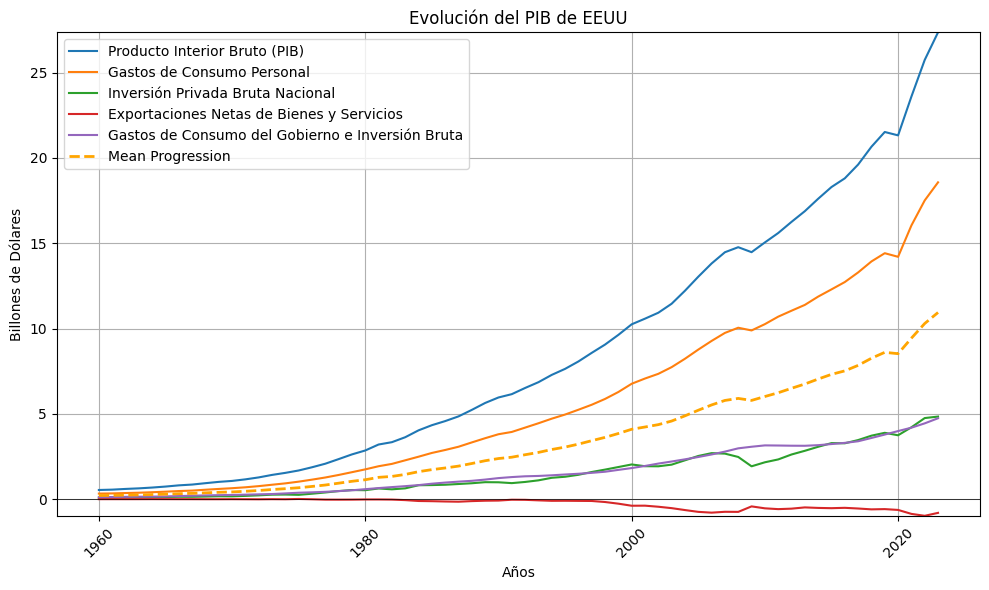

,Unnamed: 0,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Producto Interior Bruto (PIB),542.40,562.20,603.90,637.50,684.50,742.30,813.40,860.00,940.70,1017.60,1073.30,1164.90,1279.10,1425.40,1545.20,1684.90,1873.40,2081.80,2351.60,2627.30,2857.30,3207.00,3343.80,3634.00,4037.60,4339.00,4579.60,4855.20,5236.40,5641.60,5963.10,6158.10,6520.30,6858.60,7287.20,7639.70,8073.10,8577.60,9062.80,9631.20,10251.00,10581.90,10929.10,11456.50,12217.20,13039.20,13815.60,14474.20,14769.90,14478.10,15049.00,15599.70,16254.00,16880.70,17608.10,18295.00,18804.90,19612.10,20656.50,21521.40,21323.00,23594.00,25744.10,27360.90
1,Gastos de Consumo Personal,331.20,341.50,362.60,382.00,410.60,443.00,479.90,506.70,556.90,603.60,646.70,699.90,768.20,849.60,930.20,1030.50,1147.70,1274.00,1422.30,1585.40,1750.70,1934.00,2071.30,2281.60,2492.30,2712.80,2886.30,3076.30,3330.00,3576.80,3809.00,3943.40,4197.60,4452.00,4721.00,4962.60,5244.60,5536.80,5877.20,6283.80,6767.20,7073.80,7348.90,7740.70,8232.00,8769.10,9277.20,9746.60,10050.10,9891.20,10260.30,10698.90,11047.40,11388.20,11874.50,12297.40,12726.80,13290.60,13934.40,14417.60,14206.20,16043.00,17511.70,18570.60
2,Inversión Privada Bruta Nacional,86.50,86.60,97.00,103.30,112.20,129.60,144.20,142.70,156.90,173.60,170.00,196.80,228.10,266.90,274.50,257.30,323.20,396.60,478.40,539.70,530.10,631.20,581.00,637.50,820.10,829.70,849.10,892.20,937.00,999.70,993.40,944.30,1013.00,1106.80,1256.50,1317.50,1432.10,1595.60,1736.70,1887.10,2038.40,1934.80,1930.40,2027.10,2281.30,2534.70,2701.00,2673.00,2477.60,1929.70,2165.50,2332.60,2621.80,2838.30,3074.00,3288.50,3278.30,3467.70,3724.80,3892.40,3748.40,4216.30,4756.60,4843.90
3,Exportaciones Netas de Bienes y Servicios,4.20,4.90,4.10,4.90,6.90,5.60,3.90,3.60,1.40,1.40,3.90,0.60,-3.40,4.10,-0.80,16.00,-1.60,-23.10,-25.40,-22.50,-13.10,-12.50,-20.00,-51.60,-102.70,-114.00,-131.90,-144.80,-109.40,-86.70,-77.90,-28.60,-34.70,-65.20,-92.50,-89.80,-96.40,-102.00,-162.70,-259.60,-381.10,-376.70,-439.70,-522.00,-634.10,-739.90,-786.50,-735.90,-740.90,-419.20,-532.30,-579.60,-551.60,-478.50,-508.90,-524.30,-503.30,-543.30,-593.10,-578.50,-626.40,-858.20,-971.10,-798.70
4,Gastos de Consumo del Gobierno e Inversión Bruta,120.50,129.20,140.30,147.20,154.80,164.10,185.40,207.00,225.50,239.00,252.60,267.50,286.20,304.80,341.40,381.10,404.20,434.30,476.30,524.80,589.60,654.40,711.50,766.60,827.90,910.50,976.10,1031.50,1078.90,1151.90,1238.60,1299.00,1344.50,1364.90,1402.30,1449.40,1492.80,1547.10,1611.60,1719.90,1826.40,1950.00,2089.50,2210.60,2338.10,2475.30,2623.80,2790.60,2983.00,3076.30,3155.60,3147.90,3136.50,3132.60,3168.60,3233.40,3303.00,3397.10,3590.40,3789.90,3994.80,4193.10,4446.80,4745.10


In [19]:
#lop= lop[lop['Unnamed: 0'] != 'Producto Interior Bruto (PIB)']


def grafica_exportaciones(df):
    # Extraer años y colores
    years = df.columns[1:]
    colors = plt.cm.tab10.colors 

    # Configurar el gráfico
    plt.figure(figsize=(10, 6))

    # Iterar sobre cada fila (correspondiente a un continente)
    for i, row in df.iterrows():
        PIB = row['Unnamed: 0']
        values = row[1:]  # Obtener los valores de comercio para cada año

        # Convertir valores de string a float (asegurando que los números negativos se representen correctamente)
        values = pd.to_numeric(values)

        # Graficar la serie temporal para cada continente
        plt.plot(years, values, label=PIB, color=colors[i % len(colors)])

    # Calcular y graficar la línea de la progresión media
    mean_progression = df.iloc[:, 1:].mean(axis=0)
    plt.plot(years, mean_progression, label='Mean Progression', linestyle='--', linewidth=2, color='orange')

    # Configurar límites del eje y para incluir valores negativos
    ymin = df.iloc[:, 1:].values.min()  # Encontrar el valor mínimo en todos los datos (puede ser negativo)
    ymax = df.iloc[:, 1:].values.max()  # Encontrar el valor máximo en todos los datos
    plt.ylim(ymin, ymax)  # Establecer límites del eje y

    # Configuración adicional del gráfico
    plt.title('Evolución del PIB de EEUU')
    plt.xlabel('Años')
    plt.ylabel('Billones de Dólares')
    plt.legend()

    # Establecer ticks del eje x (años) con intervalo de 20 años
    plt.xticks(years[::20], rotation=45)  # Mostrar solo cada vigésimo año y rotar los años para mejor visualización

    # Ajustes en el eje y para mostrar los números en miles de millones
    plt.ticklabel_format(axis='y', style='plain')  # Evitar notación científica
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}".format(x/1000)))  # Convertir a miles de millones

    plt.tight_layout()
    plt.grid(True)  # Mostrar rejilla en el gráfico
    plt.axhline(0, color='black', linewidth=0.5)  # Línea horizontal en y=0 (origen)

    plt.show()

# Aquí asumo que 'lop' es el DataFrame que contiene los datos del PIB por año para diferentes regiones o países
grafica_exportaciones(lop)
lop

In [20]:
yearly_totals = lop.iloc[:, 1:].sum()  # Excluye la primera columna 'Unnamed: 0'

# Calcular el peso relativo de cada columna por año
# Dividir cada valor en 'lop' por el total correspondiente en 'yearly_totals'
relative_weights = lop.iloc[:, 1:].divide(yearly_totals, axis=1)*100

# Agregar la columna 'Unnamed: 0' de nuevo al DataFrame 'relative_weights'
relative_weights.insert(0, 'Unnamed: 0', lop['Unnamed: 0'])

In [21]:
relative_weights

,Unnamed: 0,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Producto Interior Bruto (PIB),50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00
1,Gastos de Consumo Personal,30.53,30.37,30.02,29.96,29.99,29.84,29.50,29.46,29.60,29.66,30.13,30.04,30.03,29.80,30.10,30.58,30.63,30.60,30.24,30.17,30.64,30.15,30.97,31.39,30.86,31.26,31.51,31.68,31.80,31.70,31.94,32.02,32.19,32.46,32.39,32.48,32.48,32.27,32.42,32.62,33.01,33.42,33.62,33.78,33.69,33.63,33.58,33.67,34.02,34.16,34.09,34.29,33.98,33.73,33.72,33.61,33.84,33.88,33.73,33.50,33.31,34.00,34.01,33.94
2,Inversión Privada Bruta Nacional,7.97,7.70,8.03,8.10,8.20,8.73,8.86,8.30,8.34,8.53,7.92,8.45,8.92,9.36,8.88,7.64,8.63,9.53,10.17,10.27,9.28,9.84,8.69,8.77,10.16,9.56,9.27,9.19,8.95,8.86,8.33,7.67,7.77,8.07,8.62,8.62,8.87,9.30,9.58,9.80,9.94,9.14,8.83,8.85,9.34,9.72,9.78,9.23,8.39,6.66,7.19,7.48,8.07,8.41,8.73,8.99,8.72,8.84,9.02,9.04,8.79,8.94,9.24,8.85
3,Exportaciones Netas de Bienes y Servicios,0.39,0.44,0.34,0.38,0.50,0.38,0.24,0.21,0.07,0.07,0.18,0.03,-0.13,0.14,-0.03,0.47,-0.04,-0.55,-0.54,-0.43,-0.23,-0.19,-0.30,-0.71,-1.27,-1.31,-1.44,-1.49,-1.04,-0.77,-0.65,-0.23,-0.27,-0.48,-0.63,-0.59,-0.60,-0.59,-0.90,-1.35,-1.86,-1.78,-2.01,-2.28,-2.60,-2.84,-2.85,-2.54,-2.51,-1.45,-1.77,-1.86,-1.70,-1.42,-1.45,-1.43,-1.34,-1.39,-1.44,-1.34,-1.47,-1.82,-1.89,-1.46
4,Gastos de Consumo del Gobierno e Inversión Bruta,11.11,11.49,11.62,11.55,11.31,11.05,11.40,12.03,11.99,11.74,11.77,11.48,11.19,10.69,11.05,11.31,10.79,10.43,10.13,9.99,10.32,10.20,10.64,10.55,10.25,10.49,10.66,10.62,10.30,10.21,10.39,10.55,10.31,9.95,9.62,9.49,9.25,9.02,8.89,8.93,8.91,9.21,9.56,9.65,9.57,9.49,9.50,9.64,10.10,10.62,10.48,10.09,9.65,9.28,9.00,8.84,8.78,8.66,8.69,8.80,9.37,8.89,8.64,8.67


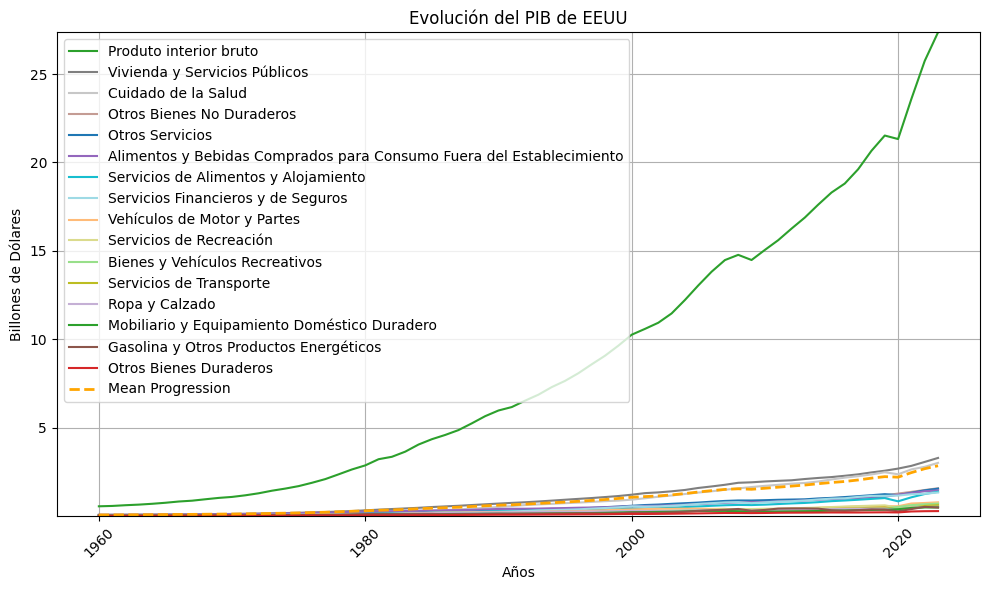

,Unnamed: 0,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,TV2022-2023
18,Servicios de Alimentos y Alojamiento,20.50,21.00,22.30,23.30,24.90,27.20,29.60,31.00,34.60,37.50,41.60,43.80,48.90,54.80,60.60,68.80,77.80,85.70,97.10,110.90,121.70,133.90,142.50,153.60,164.90,174.30,186.70,204.40,225.80,242.60,262.70,273.40,286.30,298.40,308.30,316.10,326.60,343.40,361.80,380.30,408.80,419.70,436.30,462.70,498.20,533.60,570.60,601.50,620.20,612.70,635.70,669.50,704.90,732.60,776.80,833.40,870.50,913.20,960.70,1006.70,823.90,1051.80,1237.20,1367.40,10.52
17,Servicios de Recreación,6.50,6.90,7.50,7.90,8.50,9.00,9.80,10.50,11.70,12.90,14.00,15.10,16.30,18.30,20.90,23.70,26.50,29.60,32.90,36.70,40.80,47.10,52.50,59.40,66.10,74.00,80.40,87.30,99.20,110.70,121.80,127.20,139.80,153.40,164.70,181.10,195.60,208.30,220.20,238.10,254.40,262.30,271.40,288.90,311.50,328.10,351.30,375.60,389.10,388.40,403.70,409.00,430.80,448.70,471.10,499.70,528.50,555.20,575.90,597.30,468.20,572.10,654.90,716.30,9.38
15,Cuidado de la Salud,16.00,17.10,19.10,21.00,24.10,26.00,28.70,31.90,36.60,42.10,47.70,53.70,59.80,67.20,76.10,89.00,101.80,115.70,131.20,148.80,171.70,201.90,225.20,253.10,276.50,302.20,330.20,366.00,410.10,451.20,506.20,555.80,612.80,648.80,680.50,719.90,752.10,790.90,832.00,863.60,918.40,996.60,1082.90,1154.00,1238.90,1320.50,1391.90,1478.20,1555.30,1632.70,1699.60,1757.10,1821.30,1863.80,1945.50,2059.80,2164.60,2245.30,2344.70,2469.10,2354.80,2630.50,2776.70,2999.60,8.03
16,Servicios de Transporte,9.20,9.60,10.10,10.60,11.40,12.10,13.10,14.30,15.90,18.00,20.00,22.40,24.50,26.10,28.50,32.00,36.20,41.40,45.20,50.70,55.40,59.80,61.70,68.90,80.00,90.10,95.00,103.10,114.20,121.80,126.40,123.70,133.60,145.70,161.00,176.40,192.70,211.80,225.20,241.30,261.30,259.80,251.90,259.60,271.20,283.90,297.10,307.60,312.70,297.40,305.20,328.40,341.10,360.10,382.70,393.50,411.10,429.40,456.40,480.70,358.70,459.60,562.20,604.20,7.47
14,Vivienda y Servicios Públicos,56.70,60.30,64.50,68.20,72.10,76.60,81.20,86.30,92.70,101.00,109.40,120.00,131.20,143.50,158.60,176.50,194.70,217.80,244.30,273.40,312.50,352.10,387.50,421.20,457.50,500.60,537.00,571.60,614.40,655.20,696.50,735.20,771.10,814.90,863.30,913.70,962.40,1009.80,1065.50,1123.10,1198.60,1287.50,1329.50,1391.10,1466.60,1580.10,1665.70,1759.60,1872.70,1900.00,1947.90,1983.30,2014.70,2085.70,2146.00,2196.10,2269.00,2350.20,2459.30,2554.90,2676.00,2831.00,3053.30,3278.70,7.38
11,Otros Bienes No Duraderos,27.10,28.60,30.70,32.50,34.50,37.10,40.80,43.00,46.50,49.50,53.60,55.90,60.00,65.80,72.10,77.70,85.20,91.50,103.30,116.50,129.30,143.50,154.00,168.80,184.60,196.90,209.40,225.90,241.40,263.30,283.60,297.10,314.50,331.40,350.60,371.40,395.20,421.00,451.50,498.30,534.70,564.20,591.70,623.50,658.70,691.80,741.40,772.60,786.90,803.90,828.70,858.70,880.20,903.90,949.40,997.70,1027.80,1060.80,1104.90,1158.00,1263.10,1359.00,1463.80,1562.40,6.74
20,Otros Servicios,27.10,28.30,29.90,31.60,33.80,36.60,39.90,43.60,46.80,50.50,54.60,58.10,63.70,69.30,74.40,80.30,88.60,97.70,108.30,117.20,127.10,137.20,150.90,169.90,187.50,207.90,221.20,242.40,262.80,281.10,297.50,300.50,325.70,344.30,371.00,390.60,415.50,451.50,494.20,527.40,572.60,614.00,640.80,682.10,717.90,752.80,802.30,845.70,872.10,870.30,887.90,910.60,924.40,937.00,987.00,1019.30,1065.60,1115.40,1171.30,1229.00,1178.00,1309.30,1445.80,1540.60,6.56
24,Produto interior bruto,542.40,562.20,603.90,637.50,684.50,742.30,813.40,860.00,940.70,1017.60,1073.30,1164.90,1279.10,1425.40,1545.20,1684.90,1873.40,2081.80,2351.60,2627.30,2857.30,3207.00,3343.80,3634.00,4037.60,4339.00,4579.60,4855.20,5236.40,5641.60,5963.10,6158.10,6520.30,6858.60,7287.20,7639.70,8073.10,8577.60,9062.80,9631.20,10251.00,10581.90,10929.

In [22]:
netexprgns= pd.read_excel(r"C:\Users\xabil\OneDrive\Escritorio\eeuu\PIB\pib extnew.xlsx", sheet_name='Exportaciones Netas de Bienes y')


# Lista de valores que queremos filtrar


# Filtrar filas que no contienen los valores en la lista `cl`
filtered_df = netexprgns[~netexprgns['Unnamed: 0'].isin(cl)]

# Renombrar el valor 'Goods' a 'Servicios' en la columna 'Unnamed: 0'
#filtered_df.loc[filtered_df['Unnamed: 0'] == '        Goods', 'Unnamed: 0'] = 'Servicios'
#filtered_df 

#### Gastos de consumo personal.
personalconsup= pd.read_excel(r"C:\Users\xabil\OneDrive\Escritorio\eeuu\PIB\pib extnew.xlsx", sheet_name='Gastos de Consumo Personal')
personalconsup['Unnamed: 0'].unique()
# Bienes duraderos y no duraderos,servicios.

cl= ['Gastos de Consumo Personal', 'Bienes', 'Bienes Duraderos',
       'Bienes No Duraderos','Servicios',
       'Gastos Finales de Consumo de Instituciones sin Fines de Lucro que Sirven a los Hogares (ISFLAH)',
       'Producción Bruta de Instituciones sin Fines de Lucro',
       'Menos: Ingresos por Ventas de Bienes y Servicios de Instituciones sin Fines de Lucro','Gastos de Consumo de los Hogares (por Servicios)'
       ]
personalconsup =personalconsup[~personalconsup['Unnamed: 0'].isin(cl)]
personalconsup=personalconsup.sort_values(by='2023', ascending= False)


def grafica_exportaciones(df):
    # Extraer años y colores
    years = df.columns[1:]
    colors = plt.cm.tab20.colors 

    # Configurar el gráfico
    plt.figure(figsize=(10, 6))

    # Iterar sobre cada fila (correspondiente a un continente)
    for i, row in df.iterrows():
        PIB = row['Unnamed: 0']
        values = row[1:]  # Obtener los valores de comercio para cada año

        # Convertir valores de string a float (asegurando que los números negativos se representen correctamente)
        values = pd.to_numeric(values)

        # Graficar la serie temporal para cada continente
        plt.plot(years, values, label=PIB, color=colors[i % len(colors)])

    # Calcular y graficar la línea de la progresión media
    mean_progression = df.iloc[:, 1:].mean(axis=0)
    plt.plot(years, mean_progression, label='Mean Progression', linestyle='--', linewidth=2, color='orange')

    # Configurar límites del eje y para incluir valores negativos
    ymin = df.iloc[:, 1:].values.min()  # Encontrar el valor mínimo en todos los datos (puede ser negativo)
    ymax = df.iloc[:, 1:].values.max()  # Encontrar el valor máximo en todos los datos
    plt.ylim(ymin, ymax)  # Establecer límites del eje y

    # Configuración adicional del gráfico
    plt.title('Evolución del PIB de EEUU')
    plt.xlabel('Años')
    plt.ylabel('Billones de Dólares')
    plt.legend()

    # Establecer ticks del eje x (años) con intervalo de 20 años
    plt.xticks(years[::20], rotation=45)  # Mostrar solo cada vigésimo año y rotar los años para mejor visualización

    # Ajustes en el eje y para mostrar los números en miles de millones
    plt.ticklabel_format(axis='y', style='plain')  # Evitar notación científica
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}".format(x/1000)))  # Convertir a miles de millones

    plt.tight_layout()
    plt.grid(True)  # Mostrar rejilla en el gráfico
    plt.axhline(0, color='black', linewidth=0.5)  # Línea horizontal en y=0 (origen)

    plt.show()

# Aquí asumo que 'lop' es el DataFrame que contiene los datos del PIB por año para diferentes regiones o países
grafica_exportaciones(personalconsup)
#personalconsup
##############################################
innvprbrnacional= pd.read_excel(r"C:\Users\xabil\OneDrive\Escritorio\eeuu\PIB\pib extnew.xlsx", sheet_name='Inversión Privada Bruta Naciona')
innvprbrnacional['Unnamed: 0'].unique()
cl2=['Inversión Privada Bruta Nacional','Inversión Fija','Produto interior bruto','Cambio en Inventarios Privados']
innvprbrnacional=innvprbrnacional[~innvprbrnacional['Unnamed: 0'].isin(cl2)]
#grafica_exportaciones(innvprbrnacional)
innvprbrnacional= innvprbrnacional.sort_values(by='2023', ascending= False)

#grafica_exportaciones(innvprbrnacional)
innvprbrnacional['Unnamed: 0'].unique()
cl3=['No Residencial','Equipos',
       'Residencial', 'Estructuras','Productos de Propiedad Intelectual', 'Otros', 'Equipos Informáticos y Periféricos','Equipos de Procesamiento de Información', 'Otros Equipos',
       'Equipos Industriales', 'Equipos de Transporte',
       'No Agrícola', 'Agrícola']
innvprbrnacional=innvprbrnacional[~innvprbrnacional['Unnamed: 0'].isin(cl3)]
#grafica_exportaciones(innvprbrnacional)

gastoconsumogov= pd.read_excel(r"C:\Users\xabil\OneDrive\Escritorio\eeuu\PIB\pib extnew.xlsx", sheet_name='Gastos de Consumo del Gobierno ')
gastoconsumogov['Unnamed: 0'].unique()
cl4=['Gastos de Consumo del Gobierno e Inversión Bruta','Produto interior bruto']
gastoconsumogov= gastoconsumogov[~gastoconsumogov['Unnamed: 0'].isin(cl4)]
gastoconsumogov
innvprbrnacional['Unnamed: 0'].unique()

def grafica_exportaciones(df):
    # Extraer años y colores
    years = df.columns[1:]
    colors = plt.cm.tab20.colors 

    # Configurar el gráfico
    plt.figure(figsize=(10, 6))

    # Iterar sobre cada fila (correspondiente a un continente)
    for i, row in df.iterrows():
        PIB = row['Unnamed: 0']
        values = row[1:]  # Obtener los valores de comercio para cada año

        # Convertir valores de string a float (asegurando que los números negativos se representen correctamente)
        values = pd.to_numeric(values)

        # Graficar la serie temporal para cada continente
        plt.plot(years, values, label=PIB, color=colors[i % len(colors)])

    # Calcular y graficar la línea de la progresión media
    mean_progression = df.iloc[:, 1:].mean(axis=0)
    plt.plot(years, mean_progression, label='Mean Progression', linestyle='--', linewidth=2, color='orange')

    # Configurar límites del eje y para incluir valores negativos
    ymin = df.iloc[:, 1:].values.min()  # Encontrar el valor mínimo en todos los datos (puede ser negativo)
    ymax = df.iloc[:, 1:].values.max()  # Encontrar el valor máximo en todos los datos
    plt.ylim(ymin, ymax)  # Establecer límites del eje y

    # Configuración adicional del gráfico
    plt.title('Evolución de los Productos de Propiedad Intelectual ')
    plt.xlabel('Años')
    plt.ylabel('Billones de Dólares')
    plt.legend()

    # Establecer ticks del eje x (años) con intervalo de 20 años
    plt.xticks(years[::20], rotation=45)  # Mostrar solo cada vigésimo año y rotar los años para mejor visualización

    # Ajustes en el eje y para mostrar los números en miles de millones
    plt.ticklabel_format(axis='y', style='plain')  # Evitar notación científica
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}".format(x/1000)))  # Convertir a miles de millones

    plt.tight_layout()
    plt.grid(True)  # Mostrar rejilla en el gráfico
    plt.axhline(0, color='black', linewidth=0.5)  # Línea horizontal en y=0 (origen)

    plt.show()


#grafica_exportaciones(innvprbrnacional)


personalconsup['TV2022-2023'] = ((personalconsup['2023'] - personalconsup['2022'])/personalconsup['2022'])*100
personalconsup=personalconsup.sort_values(by='TV2022-2023',ascending= False)

lol=[ '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023']
personalconsup.drop(lol,axis=1)
personalconsup